# Exploratory Data Analysis (EDA) – Descriptive Analysis 

## Monthly Sales Performance Analysis

## Which month achieved the highest total sales, and what was the total sales figure recorded during that period?

### 1. Overview

This analysis aims to explore and visualize monthly sales trends to uncover insights
into the temporal dynamics of business performance.By identifying the month with the
highest total sales, stakeholders can make informed strategic decisions such as
aligning marketing campaigns, inventory planning, and promotional activities with
high-performing periods. Through an engaging bar chart visualization, this report transforms
raw transactional data into a powerful narrative of revenue trends across the year.

### 2. Goal

- To conduct an exploratory data analysis (EDA) focused on monthly sales performance.
- To identify which month generated the highest total sales.
- To quantify the sales volume during that peak period.
- To derive actionable insights that can support data-driven decision-making and improve business strategy.

### 3. Business Challenge

- Lack of visibility into monthly sales patterns hampers effective planning and resource allocation.
- The business struggles to identify peak and off-peak sales months, limiting its ability to optimize
  promotional efforts and inventory cycles.
- Without clarity on seasonal sales trends, forecasting, and budgeting remain reactive rather than proactive.
- Decision-makers lack concrete evidence to justify strategic timing for marketing or product rollouts

### 4. Methodology

-  Clean, preprocess, and aggregate sales data by month.
- Visualize monthly sales using an intuitive bar chart to enhance interpretability.
- Highlight the month with the highest total sales and annotate its value for clarity.
- Use visual storytelling and formatted labels to make the insights easily digestible for both technical and non-technical stakeholders.
- Share recommendations based on findings to optimize business planning and improve revenue targeting.

### Import necessary libraries

In [10]:
import pandas as pd
import os
import glob

### Combine the sales data from all months into a single consolidated CSV file

In [12]:
folder_path = r"C:\Monthly_Sales"

# Retrieve all CSV files from the folder using glob
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# All CSV files combined as one DataFrame 
all_data = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Merged DataFrame saved into a new CSV
output_file = os.path.join(folder_path, "all_data.csv")
all_data.to_csv(output_file, index=False)

print("All files integrated into:", output_file)

All files integrated into: C:\Monthly_Sales\all_data.csv


### Load the updated DataFrame

In [14]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


In [15]:
df.shape

(10524393, 6)

## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [18]:
df.isna().sum()

Order ID            27328
Product Name        27328
Units Purchased     27330
Unit Price          27330
Order Date          27331
Delivery Address    27332
dtype: int64

In [19]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

In [20]:
# Check if Nan value is present

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [21]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN
3001506,150766,iPhone,1,7,NaN,NaN


#### Find and remove rows with duplicate values

In [23]:
# Find duplicate values

df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
10524388     True
10524389     True
10524390     True
10524391     True
10524392     True
Length: 10497063, dtype: bool

In [24]:
# Remove duplicated values

df.drop_duplicates(inplace = True)

In [25]:
# Check again for duplicated values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172530     False
2195228    False
3001506    False
6370083    False
6403571    False
Length: 171546, dtype: bool

### Verify and fix incorrect data types in the dataset

In [27]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

#### Fix incorrect data types

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [30]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          3
Delivery Address    2
dtype: int64

In [31]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [33]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

### Add month column

In [36]:
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4
...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10


In [37]:
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April
...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October


### Add week day column

In [39]:
df['Day of Week'] = df['Order Date'].dt.strftime('%a')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue
...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon


### Add hour column

In [41]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12
...,...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon,8
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed,22
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed,13
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon,16


### Add city column

In [43]:
def city(address):
    return address.split(",")[1].strip(" ")

def state_abbrev(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Delivery Address'].apply(lambda x: f"{city(x)}  ({state_abbrev(x)})")
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19,Boston (MA)
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13,San Francisco (CA)
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9,Dallas (TX)
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14,San Francisco (CA)
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12,Boston (MA)


### Organize Data by Order Date Chronologically and Reindex

In [45]:
df = df.sort_values(by = 'Order Date')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
78282,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
68761,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
64303,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
63092,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
74502,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
44457,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
30663,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
49246,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
30770,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


In [46]:
df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
1,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
2,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
3,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
4,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
171538,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
171539,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
171540,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
171541,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


#### Add Total Sales column

In [48]:
df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.98999,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.98999
1,151041,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99000
2,146765,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99000
3,145617,Amana Washing Machine,1,600.00000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00000
4,156535,iPhone,1,700.00000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00000


#### Format Unit Price and Total Sales to 2 decimal places

In [50]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

In [51]:
df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00
4,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00


#### Format Unit Price and Total Sales to 2 decimal places

In [53]:
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

In [54]:
df.dtypes

Order ID                     int32
Product Name              category
Units Purchased               int8
Unit Price                 float64
Order Date          datetime64[ns]
Delivery Address          category
Month                        int32
Month Name                  object
Day of Week                 object
Hour                         int32
City                        object
Total Sales                float64
dtype: object

### Determine which month recorded the highest total sales, and provide the corresponding sales figure for that period.

In [56]:
monthly_sales = df.groupby('Month')['Total Sales'].sum() 
monthly_sales                                                                                                                    

Month
1     4639312.17
2     1235017.71
3     2358783.67
4     2619873.83
5     2657978.27
6     3408613.54
7     2990038.42
8     3143681.87
9     2368652.05
10    1760182.98
11    5743349.24
12    6404121.28
Name: Total Sales, dtype: float64

## Plot Monthly Sales

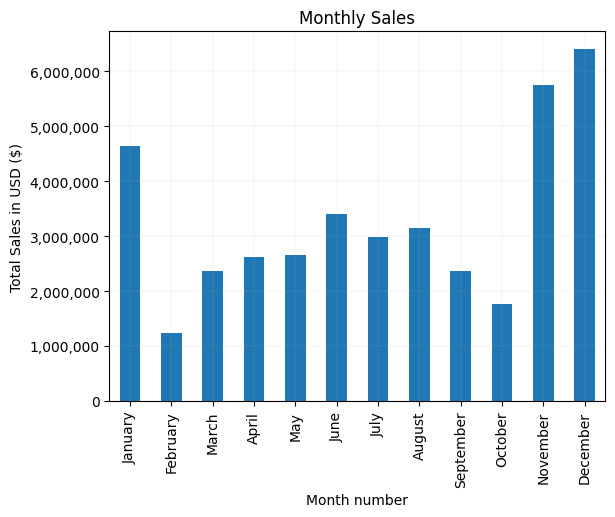

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

# Grouping by Month, ensuring Month is treated as a string or integer and not datetime
monthly_sales = df.groupby(df['Month Name'])['Total Sales'].sum()

# Reorder the months
month_order = ['January', 'February', 'March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)


# Plotting
ax = monthly_sales.plot(kind='bar', title="Monthly Sales")

ax.set_xlabel('Month number')
ax.set_ylabel('Total Sales in USD ($)')

# Format y-axis with comma separators
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=90)
plt.grid(linewidth=0.1)

plt.savefig(r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1/Monthly Sales Performance Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

## Key Insights 

1. December recorded the highest total sales, with a revenue of $6,404,121.28, making it the most profitable month of the year.
  
2. November followed as the second-highest month with $5,743,349.24, indicating a strong year-end sales trend.

3. February was the weakest month, with the lowest total sales of $1,235,017.71.

A noticeable sales surge begins from June onward, suggesting a buildup toward the end-of-year peak.

##  Strategic Recommendations 

1. Capitalize on Q4 sales momentum: Invest heavily in marketing, promotions, and inventory during November and December,
  as these months are proven high performers—likely driven by holidays, year-end bonuses, and seasonal demand.

2. Launch pre-holiday campaigns starting Q3 (around July–September) to create demand early and ride the momentum.

3. Investigate low performance in February: Look into potential causes
  (example, post-holiday fatigue, customer spending behavior, or operational lags) and 
  explore strategies like targeted promotions or loyalty incentives to boost engagement.

4. Use seasonality to guide forecasting: Align production, staffing, and budget planning with high
  and low-performing months for optimized operations and cost efficiency.